#확률론

- 딥러닝은 확률론 기본의 기계학습 이론
- 손실함수 : 데이터 공간을 통계적으로 해석해서 유도
- 회귀분석 : L2 Norm - 예측오차의 분산을 최소화
- 분류 : CE - 모델 예측의 불확실성을 최소화

##확률분포

- 데이터 공간 : XxY
- D : 데이터 공간에서 데이터를 추출하는 분포

- 데이터는 확률변수로 (x,y) ~ D



##확률분포 D에 따른 분류


1. 이산형

-  확률변수가 가질 수 있는 경우의 수를 모두 고려하여 확률에 더해서 모델링

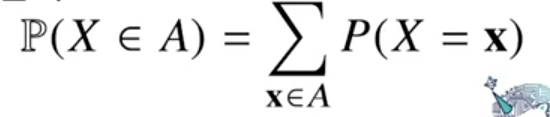

2. 연속형
- 데이터 공간에 정의된 확률변수의 밀도위에서의 적분

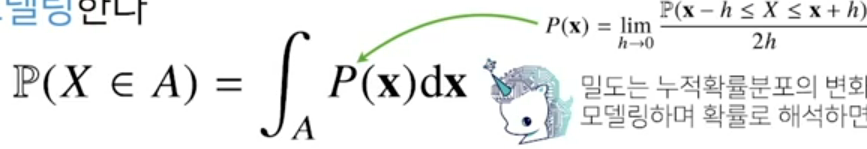

확률분포

1. 데이터공간을 X x Y 라 표기하고 D는 데이터 공간에서 데이터를 추출하는 분포

2. 데이터는 확률변수 (x,y) ~ D

3. 결합분포 P(x,y)는 D를 모델링
  - 원래 데이터의 확률분포와 주어진 데이터에 따라 이산,연속을 선택

4. P(x)는 입력 x에 대한 주변확률분포로 y에 대한 정보를 주진 않는다.

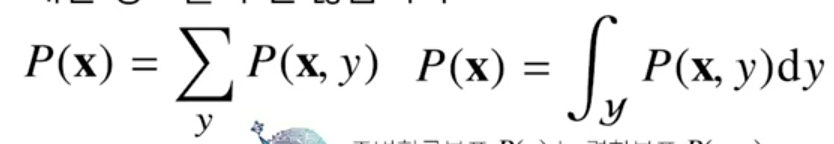

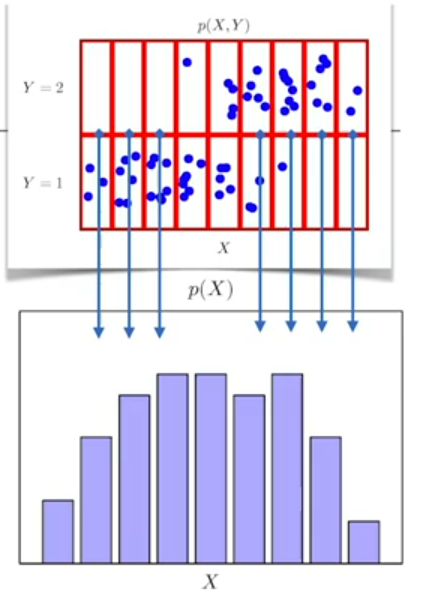

5. 조건부확률분포 P(x|y)는 데이터 공간에서 입력 x와 출력 y사이의 관계를 모델링

## 조건부확률

- 조건부확률 P(y|x)은 입력변수 x에 대해 정답이 y일 확률을 의미
  - 연속확률분포는 p(y|x)를 밀도로 해석

- 로지스틱 회귀에서 사용했던 선형모델과 소프트맥스 함수의 결합은 데이터에서 추출된 패턴을 기반으로 확률을 해석

- 분류 문제에서 softmax(Wa+b)는 데이터 x로부터 추출된 특징패턴 a(x)와 가중치행렬 W를 통해 조건부확률 P(y|x)를 계산

- 회귀 문제의 경우 조건부기댓값 E[y|x]를 추정
  - L2 Norm을 최소화하는 함수 f(x)와 일치

## 기댓값
- 확률분포가 주어지면 데이터를 분석하는 데 사용 가능한 여러 종류의 통계적 범함수를 계산할 수 있다.
- 데이터를 대표하는 통계량이면서 확률분포를 통해 다른 통계적 범함수를 계산하는데 사용
  - 연속확률분포에서는 적분을, 이산확률분포에서는 급수를 사용

  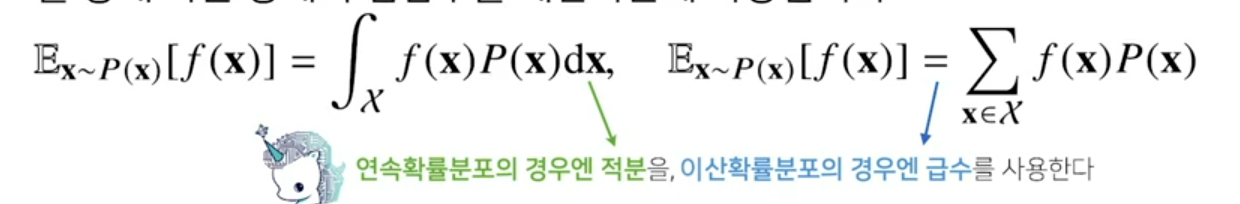

- 기댓값을 이용해 분산, 첨도, 공분산 등 여러 통계량을 계산할 수 있다.

딥러닝은 다층신경망을 사용하여 데이터로부터 특징패턴인 pie를 추출

## 몬테카를로 샘플링

- 기계학습의 많은 문제는 확률분포를 명시적으로 모를 때가 대부분
- 데이터를 이용하여 기댓값을 계산
  - 몬테카를로는 이산형이든 연속형이든 상관없이 성립

- 몬테카를로 샘플링은 독립추출만 보장된다면 대수의 법칙에 의해 수렴성을 보장

몬테카를로 샘플링 수식
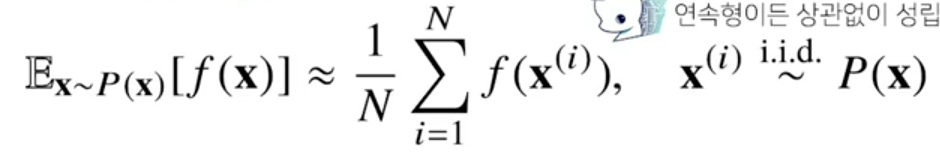

###몬테카를로를 이용하여 적분 계산
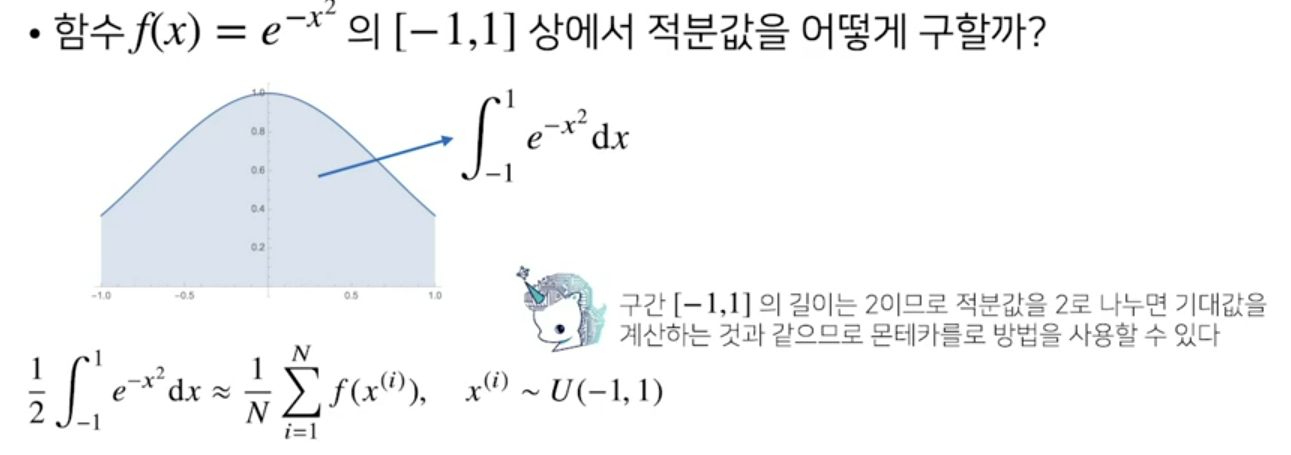


In [4]:
import numpy as np

def mc_int(fun, low, high, sample_size=100, repeat=10) :
  int_len = np.abs(high-low)
  stat = []

  for _ in range(repeat) :
    x = np.random.uniform(low=low, high=high, size=sample_size)   # uniform : 균등분포에서 샘플링
    fun_x = fun(x)  # 함수화
    int_val = int_len + np.mean(fun_x)
    stat.append(int_val)
  return np.mean(stat), np.std(stat)


def f_x(x) :
  return np.exp(-x**2)

print(mc_int(f_x, low=-1, high=-1, sample_size = 10000, repeat=100))

(0.3678794411714423, 1.6653345369377348e-16)


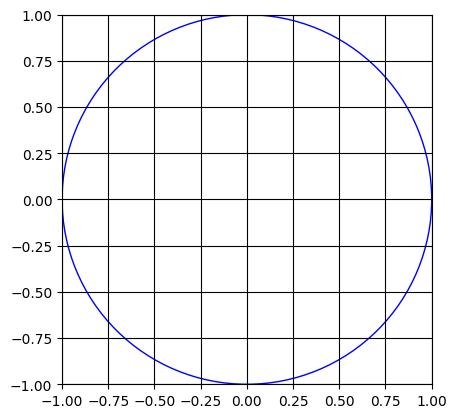

In [11]:
# 몬테카를로 방법을 이용한 원주율

import matplotlib.pyplot as plt

circle = plt.Circle((0,0), 1, fc='w', ec='b')
a = plt.axes(xlim = (-1,1) , ylim=(-1,1))

a.add_patch(circle)
a.set_aspect('equal')

plt.grid(True, axis='both', color='black', alpha=1)

plt.show()

7812


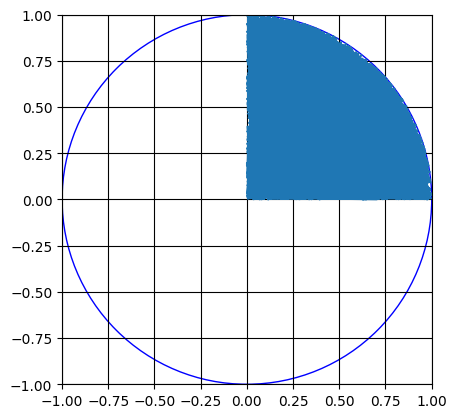

In [16]:
import numpy as np
import matplotlib.pyplot as plt

n =10000
x = np.random.rand(n)
y = np.random.rand(n)

var_x = [i for i,j in zip(x,y) if i**2+j**2 < 1]
var_y = [j for i,j in zip(x,y) if i**2+j**2 < 1]

print(len(var_x))

c = plt.Circle((0,0), 1, fc='w', ec='b')
a = plt.axes(xlim=(-1,1), ylim=(-1,1))

a.add_patch(c)

a.set_aspect('equal')

plt.grid(True, axis='both', color='black', alpha=1)
plt.plot(var_x,var_y)
plt.show()